# Exercise 5, Machine Learning 2022

The following lab-session is adapted from those of Sections 5.3 and 6.3 in Introduction to Statistical Learning with R.

### The Auto dataset
We use the `Auto` dataset that was used as an example throughout Chapter 3 on linear regression. Here, we treat the variable `mpg` (gas miles in miles per gallon) as the response and `horsepower` as the single predictor.

The data has 392 observations on the following 9 variables.

`mpg` miles per gallon

`cylinders` Number of cylinders between 4 and 8 displacementEngine displacement (cu. inches) 

`horsepower` Engine horsepower

`weight` Vehicle weight (lbs.)

`acceleration` Time to accelerate from 0 to 60 mph (sec.)

`year` Model year (modulo 100)

`origin` Origin of car (1. American, 2. European, 3. Japanese)

`name` Vehicle name

In [99]:
# Import relevant packages
import numpy as np
from pandas import read_csv, DataFrame
from math import log, sqrt
import matplotlib.pyplot as plt
import pandas as pd
import random

import statsmodels.api as sm
import statsmodels.formula.api as smf 
from statsmodels.formula.api import ols

In [100]:
# Load data from csv; change the directory as you need!
Auto = read_csv("Auto.csv")
# show the first line of the dataset to see if everything was alright
Auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


*It is recommended that you set a random seed, so that any results based on randomness are recreated whenever you run the notebook.*

*WHY DO WE NEED A SEED?*

Basically now we will split our dataset into training and test data or maybe into three so training validation and test data :

                                    |train|validation|   or   |train|validation|test| 

In order to randomly generate this subsets we want to create a random  number generator that will divide our full data into this subsets. What we also wana be able to do is to alaways retrieve the same set otherwise it would be impossible to make comparison etc... In order to do this we give our random number generator a seed which gives the ability of retrieving the same sequence every time

written by Lamberto


In [101]:
## Set seed!
# np.random.seed(42)
random.seed(42)

## The validation set approach

Split the set of observations into two halves by selecting a random subset of 196 obervations out of the original 392 observations. We refer to these observations as the *training set* and the remaining observations as the *validation set*. For creating the random split, you can use `random.sample(seq, n)` to select `n` numbers without replacement from the sequence `seq`. (There is also a built-in function `train_test_split` that can split your data, but here you split it yourself so that you understand in detail how to achieve the datasets).

In [102]:
# What we are gonna do here is split our data into set and training data 
# explanation on the markdown below

def randomize_split(n, n_samples):

    train = random.sample([x for x in range(n)], n_samples)

    validation = [x for x in range(n) if x not in train]

    return train,validation

*Retrieve indexes from the split*

What we want to do is split the data into half training and half validation so instead of doing it directly on the samples of the dataset we simply can yield a division on indexes (numbers). Doing this we get two sets of numbers that will be the samples to retrieve from the dataset.

Daset -> 392 samples

training set -> 196 samples

validation set -> 196 samples

I.e 
if in the first set (the training), we have number 67 then the sample 67 will be part of the training set and the same is for validation.
This ease the way of splitting the set cause we simply do a set division on numbers NOT DIRECTLY ON DATA SAMPLES.

written by Lamberto

In [103]:
# retrieve the splitted sets
train, test = randomize_split(392, 392//2)
print("this are the indexes of the training set :", train)
print("this are the indexes of the test set :", test)

this are the indexes of the training set : [327, 57, 12, 379, 140, 125, 114, 71, 377, 52, 346, 388, 279, 44, 302, 216, 16, 15, 47, 111, 119, 258, 308, 13, 287, 101, 332, 359, 380, 214, 112, 229, 301, 142, 3, 81, 376, 174, 358, 79, 110, 172, 382, 373, 194, 49, 183, 176, 309, 135, 22, 235, 274, 63, 193, 40, 282, 150, 321, 316, 185, 295, 98, 35, 23, 116, 148, 336, 371, 51, 347, 353, 232, 186, 83, 189, 181, 107, 136, 36, 311, 87, 273, 386, 317, 236, 333, 138, 285, 361, 166, 28, 117, 375, 161, 205, 137, 33, 108, 290, 297, 293, 255, 202, 234, 73, 342, 384, 126, 275, 134, 219, 204, 331, 383, 70, 260, 252, 46, 24, 56, 78, 356, 355, 32, 197, 195, 239, 128, 5, 58, 313, 354, 390, 334, 222, 80, 326, 0, 244, 184, 224, 251, 67, 263, 265, 45, 129, 233, 27, 256, 160, 76, 215, 163, 339, 155, 50, 39, 95, 246, 41, 304, 199, 303, 253, 153, 82, 369, 4, 300, 92, 212, 206, 270, 61, 14, 268, 145, 20, 21, 187, 124, 208, 17, 305, 335, 196, 267, 203, 168, 121, 387, 42, 248, 227]
this are the indexes of the test 

In [104]:
# Now we have only the indexes so what we need to do is actually split the dataset with the real features

# first the training set

# The .iloc indexer is used for integer-location based indexing in pandas. 
# It allows you to select rows and columns by their integer position (i.e., index numbers).
# So the iloc is exactly what we need to map our features to our indexes
# the syntax is iloc[row_indices, column_indices]
# in our case we want the train indexes as rows and all the columns
train = Auto.iloc[train, :]
print("train set is : \n",train.head(1),"\n")

# Now we retrieved the features from the dataset and we are inetreseted in specific columns
# the specific columns are horsepower and mpg
# mpg is what we want to predict so the dependent variable
# horsepower is what we use to predict so the indipendent variable
x_train = train['horsepower']
y_train = train['mpg']
# remember the intercept is to add 
x_train = sm.add_constant(x_train)
print("linear variable with intercept :\n",(x_train))

train set is : 
       mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
327  44.6          4          91.0          67    1850          13.8    80   

     origin                 name  
327       3  honda civic 1500 gl   

linear variable with intercept :
      const  horsepower
327    1.0          67
57     1.0          80
12     1.0         150
379    1.0          67
140    1.0          67
..     ...         ...
121    1.0         110
387    1.0          86
42     1.0         170
248    1.0         140
227    1.0         180

[196 rows x 2 columns]


In [105]:
# now the validation set

testing = Auto.iloc[test,:]
print("this is the test set : \n", testing.head(1), "\n")

y_test = testing['mpg']
x_test = testing['horsepower']
x_test = sm.add_constant(x_test)
print("this is the testing variable with intercept : \n", x_test)



this is the test set : 
     mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
1  15.0          8         350.0         165    3693          11.5    70   

   origin               name  
1       1  buick skylark 320   

this is the testing variable with intercept : 
      const  horsepower
1      1.0         165
2      1.0         150
6      1.0         220
7      1.0         215
8      1.0         225
..     ...         ...
378    1.0          67
381    1.0          85
385    1.0          84
389    1.0          84
391    1.0          82

[196 rows x 2 columns]


Fit a linear regression on the training set: `mpg`$= \beta_0 + \beta_1$ `horsepower` $+\epsilon$.

In [106]:
# we wanna fit a linear regression predicting mpg regressed on horsepower
# we are now working not with the whole set but with the training set
# we use OLS and not ols because we are handling our own sets and the OLS gives the possibiity to 
# pass directly our created design matrix (intercept + variables), that we created before
lm1 = sm.OLS(y_train,x_train)
# fit the model -> actually do the linear regression
lm1 = lm1.fit()
# summary gives us the result of the linear regression
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.596
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     286.6
Date:                Wed, 02 Oct 2024   Prob (F-statistic):           4.47e-40
Time:                        08:30:09   Log-Likelihood:                -573.57
No. Observations:                 196   AIC:                             1151.
Df Residuals:                     194   BIC:                             1158.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.7094      1.011     39.271      0.000      37.715      41.704
horsepower    -0.1620      0.010    -16.930      0.000      -0.181      -0.143
==============================================================================
Omnibus:                        7.055   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.029   Jarque-Bera (JB):                6.755
Skew:                           0.420   Prob(JB):                       0.0341
Kurtosis:                       3.350   Cond. No.                         330.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Compute the MSE on the 196 observations that are the validation set.

In [107]:
# in order to compute the MSE on the validation we want to use the model to predict the validation y's by fitting the model with
# the x's that it never saw which are the x's of the validation set 
predictions = lm1.predict(x_test)
predictions

1      12.975070
2      15.405466
6       4.063616
7       4.873748
8       3.253484
         ...    
378    28.853660
381    25.937184
385    26.099211
389    26.099211
391    26.423264
Length: 196, dtype: float64

In [108]:
# now we to compute MSE we are basically gonna compare them with the actual real y's that are in our y_test
# first we can have a visual comparison 
comparison = pd.DataFrame({
    "predicted" : predictions,
    "reality" : y_test 
})
comparison

,predicted,reality
1,12.975070,15.0
2,15.405466,18.0
6,4.063616,14.0
7,4.873748,14.0
8,3.253484,14.0
...,...,...
378,28.853660,32.0
381,25.937184,38.0
385,26.099211,36.0
389,26.099211,32.0


In [109]:
# the predict() function gives us simply the result of the linear model and nothing more
# while when we use get_prediction() we get a more structured output with many more informations
prediction_stats =  lm1.get_prediction(x_train)
summary = prediction_stats.summary_frame()
summary

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
327,28.853660,0.453091,27.960043,29.747277,19.858474,37.848846
57,26.747316,0.376829,26.004108,27.490524,17.765826,35.728807
12,15.405466,0.577381,14.266716,16.544216,6.382630,24.428302
379,28.853660,0.453091,27.960043,29.747277,19.858474,37.848846
140,28.853660,0.453091,27.960043,29.747277,19.858474,37.848846
...,...,...,...,...,...,...
121,21.886523,0.337789,21.220314,22.552733,12.911076,30.861971
387,25.775158,0.351042,25.082808,26.467507,16.797733,34.752583
42,12.164937,0.743584,10.698391,13.631484,3.094900,21.234975
248,17.025730,0.501072,16.037482,18.013979,8.020651,26.030810


In [110]:
# Now based on our prediction stats lets retrieve the actual values and compute the Mean Squared Error
# values are stored under the field : mean
predicted_values = summary["mean"]
# the followinig will compute the mse between real values and predicted values of the test data
mse = sm.tools.eval_measures.mse(y_test,predicted_values)
mse

np.float64(111.47647729910564)

Now estimate also the MSE for the quadradic and cubic regressions.

The ISLwR book found an estimated test MSE of (23.27, 18.27, and 18.79) for the three regression models. 

Set another seed and create a different split of your data - do you get different results? Why?


In [111]:
# now given that we are tryin to find the mse for different mse's for different models, 
# we can simply create a function where we will pass our model so that it gives back the mse

def compute_mse(model,x,y):
    # simply compute the same procedure we've done for the one above
    pred_stats = model.get_prediction(x)
    summary_frame = pred_stats.summary_frame()
    pred_values = summary_frame['mean']
    calculated_mse = sm.tools.eval_measures.mse(y,pred_values)  
    return calculated_mse


*HOW DO WE FIND THE QUADRATIC AND CUBIC REGRESSIONS??*

to find what we are searching for we can use some built-in functions from sklearn. What we are gonna use is PolynomialFeatures : 
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

written by Lamberto Ragnolini

In [112]:
from sklearn.preprocessing import PolynomialFeatures

In [113]:
# first thing first retrieve the desidered column feature we will use
# we transform it into a numpy array
x = train["horsepower"].to_numpy()
# thanks to the built in function we can retrieve the quadratic polynomial,
# here we simply create an object that will be able to give us back the new features later
new_quadratic_features = PolynomialFeatures(degree=2)
# from teacher :
#   if you don't reshape X as such if it's a single feature
#   vector you will get an error telling you to do so
# by reshaping we change the dimension from (n) to (n,1), it is like a matrix 
# the fit_transform is able to transform the features and give us back also the new quadratic ones
x_quadratic_train = new_quadratic_features.fit_transform(x.reshape(-1,1))
print("the shape of the new matrix is : \n",x_quadratic_train.shape, "\n" )
print("while the new training matrix is : \n", x_quadratic_train,"\n" )



the shape of the new matrix is : 
 (196, 3) 

while the new training matrix is : 
 [[1.0000e+00 6.7000e+01 4.4890e+03]
 [1.0000e+00 8.0000e+01 6.4000e+03]
 [1.0000e+00 1.5000e+02 2.2500e+04]
 [1.0000e+00 6.7000e+01 4.4890e+03]
 [1.0000e+00 6.7000e+01 4.4890e+03]
 [1.0000e+00 1.0000e+02 1.0000e+04]
 [1.0000e+00 1.4500e+02 2.1025e+04]
 [1.0000e+00 1.5000e+02 2.2500e+04]
 [1.0000e+00 6.7000e+01 4.4890e+03]
 [1.0000e+00 6.5000e+01 4.2250e+03]
 [1.0000e+00 6.3000e+01 3.9690e+03]
 [1.0000e+00 5.2000e+01 2.7040e+03]
 [1.0000e+00 8.5000e+01 7.2250e+03]
 [1.0000e+00 1.1000e+02 1.2100e+04]
 [1.0000e+00 6.9000e+01 4.7610e+03]
 [1.0000e+00 5.8000e+01 3.3640e+03]
 [1.0000e+00 9.7000e+01 9.4090e+03]
 [1.0000e+00 9.5000e+01 9.0250e+03]
 [1.0000e+00 8.8000e+01 7.7440e+03]
 [1.0000e+00 8.5000e+01 7.2250e+03]
 [1.0000e+00 1.1200e+02 1.2544e+04]
 [1.0000e+00 1.1000e+02 1.2100e+04]
 [1.0000e+00 6.0000e+01 3.6000e+03]
 [1.0000e+00 2.2500e+02 5.0625e+04]
 [1.0000e+00 1.5500e+02 2.4025e+04]
 [1.0000e+00 4.60

In [114]:
# Now it is time to fit the model 
# do exactly what we did before but with the new features
lmq = sm.OLS(y_train,x_quadratic_train).fit()
lmq.summary() # print this to see the parameters of the regression

# now get the mse of the regression
# remembeeer that we are working with 2d's array so we have to transform
x_quadratic_test = new_quadratic_features.fit_transform((testing['horsepower']).to_numpy().reshape(-1,1))
quadratic_mse = compute_mse(lmq, x_quadratic_test,y_test)
print("the quadratic mse is :", quadratic_mse)



the quadratic mse is : 21.202064720220054


*NOW DO THE SAME THING FOR THE CUBIC MODEL*

follow the same procedure that was done for the quadratic but change the polynomial degree to cubic meaning degree=3

written by Lamberto Ragnolini

In [115]:
# cubic regression
new_cubic_features = PolynomialFeatures(degree=3)

# create new fetaures
new_x = train['horsepower']
x_cubic_train = new_cubic_features.fit_transform(new_x.to_numpy().reshape(-1,1))
x_cubic_testing = new_cubic_features.fit_transform(testing['horsepower'].to_numpy().reshape(-1,1))

# do the regression
lmc = sm.OLS(y_train,x_cubic_train).fit()
lmc.summary() #print this if you wanna see the regression parameters

# get the mse of the cubic regression
cubic_mse = compute_mse(lmc,x_cubic_testing, y_test)
print("the cubic mse is : ", cubic_mse)


the cubic mse is :  21.213560453128846


Which model would you choose based on the estimated MSE? 

I would personally choose the quadratic one because it's mse is the lowest

written by Lamberto Ragnolini


If you instead train the models on the entire data and perform model selection via F-tests or AIC, would you choose differently?

In [116]:
# The only way to find out is to actually compute them so: 

lm1_total_data = ols("mpg ~ horsepower", Auto).fit()
lm_quadratic_total_data = ols("mpg ~ horsepower + I(horsepower**2)",Auto).fit()
lm_cubic_total_data = ols("mpg ~ horsepower +I(horsepower**2) + I(horsepower**3)", Auto).fit()

print("first model aic is : ", lm1_total_data.aic)
print("qudratic model aic is : ", lm_quadratic_total_data.aic)
print("cubic model aic is : ", lm_cubic_total_data.aic)

first model aic is :  2361.3236578374017
qudratic model aic is :  2272.353522359692
cubic model aic is :  2273.531296711554


From the initial choice that someone would make, the preferred model to choose is the second one because it has the lower aic. As the teacher points out though, aic tends to favorite easier models and sometimes this results in underfitting so we gotta be careful when we actually make our choice.

## Leave-one-out cross-validation

Implement leave-one-out cross-validation and use it to estimate the MSE for the three regression models above.

In [117]:
# WATCH NOTES if you don't remember how this works
# general concept :
#   split data into n partitions, from every partition leave one point out that is gonna be used for testing
#   given this approach we will have ith test mse for each partition
#   this leads to a test mse = AVG(test error) of all the mse'set

# As ususal we don't have to complicate our life by implementing from scratch the methods but we can use built-in functions
from sklearn.model_selection import LeaveOneOut

# declare and instance of the leaveOneOut method
loocv = LeaveOneOut()

In [118]:
# returns the desidered model
# more explanation below in the call

def compute_desidered_formula_model(i):
    
    formula = "mpg ~ horsepower"

    if i == 1 :
        return formula
    else :
        for j in range(2,i+1):
            formula += f" + I(horsepower**{j})"

    return formula


In [119]:
# We want now to estimate the mse using leaveOneOut approach of the three created models

# create a variable where to store the mse we get as answer
mses = [0] *3

# the splitting basically splits the data into training and testing data for each iteration, that are gonna be stored in the two train,test data,
# enumerate basically gives the counter increment to i
# To recap, this iteration iterates for n times with n being the number of data points in the dataset, every time it creates a :
#   training set [0,...,n-1] containing n-1 elements
#   test set [i] containing the ith element of the iteration 
for i,(train,test) in enumerate(loocv.split(Auto)):
    # now we have to keep track of the models we wanna create
    model = []
    # remember the indexes fact, now we have to retrieve the real feautures
    train_loocv = Auto.iloc[train] #training features
    test_loocv = Auto.iloc[test] #test feature
    real_y = test_loocv['mpg'] # dependent variable we are interested in, the real one
    test_x = test_loocv['horsepower'] #independent variable we are interested in

    # now we wanna test the models we created before with the quadratic, cubic etc...
    # to do this we can create an auxilliary function that gives us back the model desidered
    for j in range(1,4):
        # retrieve formula 
        formula = compute_desidered_formula_model(j)
        # compute regression
        lm = ols(formula,train_loocv).fit()
        # save the computed regression
        model.append(lm)
    
    for l in range(len(model)):
        # As before calculate the mse for the current model
        pred = model[l].get_prediction(test_x).summary_frame()["mean"]
        # BEE CAREFULL here WE ARE ADDING the msees for every iteration, THIS IS VERY IMPORTANT
        # the overall mse is the avg(test error) and to get it we need to have the overall result of all the calculated mses
        mses[l] += sm.tools.eval_measures.mse(real_y,pred)
    
for i in range(len(mses)):
    avg_mse = mses[i] / (Auto.shape[0])
    print(avg_mse)


24.231513517929244
19.248213124489528
19.334984064022766


## k-fold cross-validation

Estimate the MSE now from k-fold cross-validation that you implement yourself. If you set k=10, then you get Figure 5.6 from the book, but you are welcome to choose another k. Make sure that you properly randomise observations into the k folds! One way is to first make a random permutation of row indices and then chop the re-ordered dataset into k (roughly) even parts.

The LOOCV estimate of the MSE can also be computed automatially with sklearn. In fact, sklearn provides a lot of functionality for cross-validation. However, our objective right now is to understand how the algorithms work, so that you learn to reflect on them and use the automatic functionality appropriately.

In [120]:
# k-fold cross-validation leaves 1 kth of the data out at a time
# in the ith held-out we compute the MSE and then we take the avg of all the calculated mse
# to work with k fold just import it from sklearn

from sklearn.model_selection import KFold
k = 10
k_folds = KFold(n_splits = k)

In [121]:
models_mses = [0] * 3

# we have to properly randomize the observations in the folds so we need to take
# into consideration the permutation suggested in the markdown above

# the sample function randomly samples lines from the dataset 
# frac=1 means that we are sampling 100% of the row, so effectively shuffling the entire dataframe
# after the indexing the indexes are messed up so we use reset_index to reindex the new shuffled column 0 to n-1
# drop = true means that we are dropping the old indexes
auto_sh = Auto.sample(frac=1).reset_index(drop=True)

# do the exact same thing we did above

for i,(train,test) in enumerate(k_folds.split(auto_sh)):
    # now we have to keep track of the models we wanna create
    model = []
    # remember the indexes fact, now we have to retrieve the real feautures
    train_loocv = Auto.iloc[train] #training features
    test_loocv = Auto.iloc[test] #test feature
    real_y = test_loocv['mpg'] # dependent variable we are interested in, the real one
    test_x = test_loocv['horsepower'] #independent variable we are interested in

    # now we wanna test the models we created before with the quadratic, cubic etc...
    # to do this we can create an auxilliary function that gives us back the model desidered
    for j in range(1,4):
        # retrieve formula 
        formula = compute_desidered_formula_model(j)
        # compute regression
        lm = ols(formula,train_loocv).fit()
        # save the computed regression
        model.append(lm)
    
    for l in range(len(model)):
        # As before calculate the mse for the current model
        pred = model[l].get_prediction(test_x).summary_frame()["mean"]
        # BEE CAREFULL here WE ARE ADDING the msees for every iteration, THIS IS VERY IMPORTANT
        # the overall mse is the avg(test error) and to get it we need to have the overall result of all the calculated mses
        models_mses[l] += sm.tools.eval_measures.mse(real_y,pred)
    
for i in range(len(models_mses)):
    avg_k_mse = models_mses[i] / k
    print(avg_k_mse)




27.439933652339864
21.235840055806367
21.3366061836332


Extend your code with a for-loop that iterates over increasing orders of the polynomial (1 to 10). Note that is possible to autogenerate a design matrix with all the terms of the polynomial with functions such as `sklearn.preprocessing.PolynomialFeatures` (It should also work for several features; a degree 2 polynomial in features x1 and x2 would need  $1+x_1+x_2+x_1x_2+x_1^2+x_2^2$, i.e. also the term $x_1x_2$.)

In [122]:
models_mses = [0] * 10

# do the exact same thing we did above

for i,(train,test) in enumerate(k_folds.split(auto_sh)):
    model = []
    train_loocv = Auto.iloc[train] #training features
    test_loocv = Auto.iloc[test] #test feature
    real_y = test_loocv['mpg'] # dependent variable we are interested in, the real one
    test_x = test_loocv['horsepower'] #independent variable we are interested in

    # Now instead of stopping only to the cubic we fit our model with polynomials of up to 10th degree
    for j in range(1,11):
        formula = compute_desidered_formula_model(j)
        lm = ols(formula,train_loocv).fit()
        model.append(lm)
    
    for l in range(len(model)):
        pred = model[l].get_prediction(test_x).summary_frame()["mean"]
        models_mses[l] += sm.tools.eval_measures.mse(real_y,pred)
    
avg_mses = []
for i in range(len(models_mses)):
    avg_mse = models_mses[i] / 10
    avg_mses.append(avg_mse)
    print(f"mse for degree {i+1}  : {avg_mse}")


mse for degree 1  : 27.439933652339864
mse for degree 2  : 21.235840055806367
mse for degree 3  : 21.3366061836332
mse for degree 4  : 21.35388692299275
mse for degree 5  : 20.905668490831523
mse for degree 6  : 20.8970104598246
mse for degree 7  : 20.95533584531355
mse for degree 8  : 25.655499601754162
mse for degree 9  : 25.912028574581917
mse for degree 10  : 65.60749032372748


Plot the resulting MSE curve against the degree of the polynomial (this is the complexity or the flexibility). 

Do you get the same conclusion as before regarding your choice of model?

Was it faster than LOOCV?

([<matplotlib.axis.XTick at 0x7fac307ec400>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

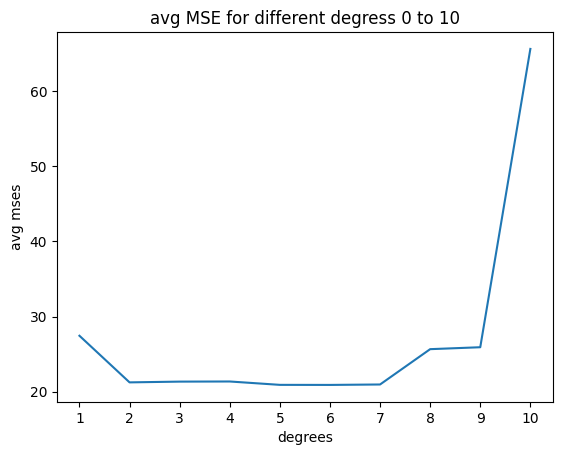

In [123]:
# list(range(1,11)) generates the values 1-10 that will be on the x axis
plt.plot(list(range(1,11)),avg_mses)
plt.title("avg MSE for different degress 0 to 10")
plt.xlabel("degrees")
plt.ylabel("avg mses")
# ensures that all the units on the x-axis are displayed
plt.xticks(list(range(1,11)))

Answer taken from Teaching assistant : 

Based on the above plot, we would still choose the 2nd degree polynomial.
We can also notice that the KFold with 10 splits executed a lot faster than the LOOCV (Which makes sense, because LOOCV is esentially KFold with K=n, where n is the number of samples in your dataset. These numbers of folds correspond with how many times you execute the loop, so the more folds you have the slower the calculation will be).

## Shrinkage/Regularization

Now try the two shrinkage methods we saw on Thursday, ridge regression and lasso. To make things a bit more exciting, include in your models all variables available in the dataset, and perhaps a few polynomial terms for `horsepower` now that you know they are relevant. The `name` variable is evidently an identifyer and should not be used as a predictor in the model.

The Lasso estimates for coefficients $\beta$ in a linear regression model are found by minimising $RSS + \lambda\sum_{j=1}^p|\beta_j|$ rather than RSS. 

In Ridge regression, we estimate $\beta$ by minimising $RSS + \lambda\sum_{j=1}^p\beta_j^2$ rather than RSS. 

In both cases, we need to set the regularation parameter $\lambda$. **The parameter $\lambda$ is called `alpha` in the Python implementations**


The relevant method in the statsmodel library is `fit_regularized`, which you use in place of `fit` after instantiating an ols model. If `L1_wt=1`, the fit is the lasso (L1-penalty). Ridge regression (L2-penalty) is obtained by setting `L1_wt=0`.  The reason we need to set parameter `L1_wt` is that the method actually implements the more general 'elastic net' penalty, which is a convex combination of the Lasso penalty and the ridge regression penalty with weight `L1_wt`. The fitting method returns a `RegressionResults` object, from which you can extract `params` and `fittedvalues`, and it has a `predict` method just like the usual linear regression output from ols.

The sklearn libary has methods `Ridge` and `Lasso`. 

**Set aside a test set of about 25% of the data that you can use at the end to estimate the MSE of your final model. Use the remaining data to train the regularised regression models.**

### Ridge regression

First, carry out a ridge regression where the regulation parameter $\lambda$ is fixed at 10. 

In [124]:
from sklearn.linear_model import Ridge

# we wanna keep 25% of the data for the testing part so 75% will be for the training

# .shape[0] returns the number of rows, so we get the total number of samples
train_indexes = int(Auto.shape[0] *0.75)
# select from 0 to 294 (train_indexes)
# the 1:8 means to select feautures from the second column till the last, have a look at the dataset to see which features toi leave out i.e name
train_x = (Auto.iloc[:train_indexes,1:8]).to_numpy()
# this selects only the values from the 0th column which are the true values 0 or 1
train_y = (Auto.iloc[:train_indexes, 0]).to_numpy()
# same for this two but for the testing data
test_x = (Auto.iloc[train_indexes:, 1:8]).to_numpy()
test_y = (Auto.iloc[train_indexes:, 0]).to_numpy()

print(train_indexes)

294


In [125]:
# now do ridge
# start with alpha = 10
# fit model
ridge_regression = Ridge(alpha=10)
ridge_regression.fit(train_x,train_y)

# test the model always using the predict
# calculate the mse for it
predictions = ridge_regression.predict(test_x)
ridge_mse = sm.tools.eval_measures.mse(test_y,predictions)
print(ridge_mse)


35.86250991322583


In fact, $\lambda = 10$ is a rather arbitrary suggestion. We need to decide on a suitable value for the hyperparameter $\lambda$. This we can do using a dedicated validation set, or we could do it by cross-validation. We do the latter.

Take a suitable range of $\lambda \in [0, \infty)$, for instance you can take a sequence $10^i, i=-2, \ldots, 5$. Using 5-fold cross-validation to estimate the MSE (call it `MSE_lambda`) for each $\lambda$, make a plot of how MSE changes with $\lambda$. Based on this plot, how would you choose $\lambda$? 

In [128]:
# the following code is identical to the solution but yields problems so just copied code from solutions

# retrieve the features
# train_features = auto_sh.iloc[:train_indexes]

# fold_five = KFold(n_splits=5)

# model_mses = [0] * 8

# for i,(train_i,test_i) in enumerate(fold_five.split(train_features)):
#     model = []
    
#     # taken from solution
#     train_loocv = train_features.iloc[train_i]
#     y_train_loocv = train_loocv.iloc[:,0]
#     train_loocv = train_loocv.iloc[:,1:8]
#     val_loocv = train_features.iloc[test_i]
#     true_vals = val_loocv.iloc[:, 0]
#     val_loocv = val_loocv.iloc[:, 1:8]

#     # now our lambda needs to be 10^j with j= -2...5
#     for j in range(-2,6):
#         lamda = 10**j
#         ridge_reg = Ridge(alpha=lamda)
#         ridge_reg.fit(train_loocv,y_train_loocv)
#         model.append(ridge_reg)
    
#     for l in range(8):
#         predictions = model[l].predict(val_loocv)
#         model_mses[i] += sm.tools.eval_measures.mse(true_vals, predictions)
    
# avg_mses = []
# for i in range(8):
#     avg_mse = models_mses[i] / 5
#     avg_mses.append(avg_mse)
#     print(f"mse for lamda {i-2}  : {avg_mse}")

train_data = auto_sh.iloc[:train_indexes]

kf5 = KFold(n_splits=5)
metrics = [0] * 8

for i, (train_idx, val_idx) in enumerate(kf5.split(train_data)):
    
    models = []
    
    train_loocv = train_data.iloc[train_idx]
    y_train_loocv = train_loocv.iloc[:,0]
    train_loocv = train_loocv.iloc[:,1:8]
    val_loocv = train_data.iloc[val_idx]
    true_vals = val_loocv.iloc[:, 0]
    val_loocv = val_loocv.iloc[:, 1:8]
    
    for i in range(-2, 6):
        
        curr_lambda = 10**i
        curr_ridge = Ridge(alpha = curr_lambda)
        curr_ridge.fit(train_loocv, y_train_loocv)
        models.append(curr_ridge)
    
    for i in range(8):

        curr_preds =  models[i].predict(val_loocv)
        metrics[i] += sm.tools.eval_measures.mse(true_vals, curr_preds)

mses = []
for i in range(8):
    avg_mse = metrics[i] / 5
    mses.append(avg_mse)
    print(f"Avg MSE (val data) for ridge regression with lambda={i-2}: {avg_mse}")




Avg MSE (val data) for ridge regression with lambda=-2: 12.81909362255712
Avg MSE (val data) for ridge regression with lambda=-1: 12.818921174735584
Avg MSE (val data) for ridge regression with lambda=0: 12.817316378911105
Avg MSE (val data) for ridge regression with lambda=1: 12.810705977585448
Avg MSE (val data) for ridge regression with lambda=2: 12.936294798447047
Avg MSE (val data) for ridge regression with lambda=3: 13.637184809237393
Avg MSE (val data) for ridge regression with lambda=4: 17.19582531048932
Avg MSE (val data) for ridge regression with lambda=5: 19.33671937042007


Having chosen a $\lambda$, would it be appropriate to report the corresponding `MSE_lambda` as the test error for the ridge regression?
Compute the test MSE using the dedicated test set and compare to `MSE_lambda`.

In [134]:
# the lowest mse is the one for lamda=1
# so regress with that tuning parameter
ridge_lowest_lamda = Ridge(alpha=1)
ridge_lowest_lamda.fit(train_x,train_y)

predictions = ridge_lowest_lamda.predict(test_x)
mse = sm.tools.eval_measures.mse(test_y,predictions)
print(mse)


35.51363598342456


In fact, once we have chosen the regularisation parameter $\lambda$, we should preferably make use of *all of the data* to (re-)train the model, and then report the associated test MSE from the test data. Do this, and inspect the model estimates.

### Lasso

Following the same procedure as for ridge regression, train a lasso regression where the regularisation parameter $\lambda$ is selected by cross-validation. 

In [136]:
# we have to do THE EXACT SAME THING WE DID ABOVE BUT WHITH LASSO
from sklearn.linear_model import Lasso

train_data = auto_sh.iloc[:train_indexes]

kf5 = KFold(n_splits=5)
metrics = [0] * 8

for i, (train_idx, val_idx) in enumerate(kf5.split(train_data)):
    
    models = []
    
    train_loocv = train_data.iloc[train_idx]
    y_train_loocv = train_loocv.iloc[:,0]
    train_loocv = train_loocv.iloc[:,1:8]
    val_loocv = train_data.iloc[val_idx]
    true_vals = val_loocv.iloc[:, 0]
    val_loocv = val_loocv.iloc[:, 1:8]
    
    for i in range(-2, 6):
        
        curr_lambda = 10**i
        curr_ridge = Lasso(alpha = curr_lambda)
        curr_ridge.fit(train_loocv, y_train_loocv)
        models.append(curr_ridge)
    
    for i in range(8):

        curr_preds =  models[i].predict(val_loocv)
        metrics[i] += sm.tools.eval_measures.mse(true_vals, curr_preds)

mses = []
for i in range(8):
    avg_mse = metrics[i] / 5
    mses.append(avg_mse)
    print(f"Avg MSE (val data) for ridge regression with lambda={i-2}: {avg_mse}")

Avg MSE (val data) for ridge regression with lambda=-2: 12.811170745105883
Avg MSE (val data) for ridge regression with lambda=-1: 12.840102080858182
Avg MSE (val data) for ridge regression with lambda=0: 13.272735294870765
Avg MSE (val data) for ridge regression with lambda=1: 19.723326128330505
Avg MSE (val data) for ridge regression with lambda=2: 20.308328470151285
Avg MSE (val data) for ridge regression with lambda=3: 21.70849684721885
Avg MSE (val data) for ridge regression with lambda=4: 62.44337977329243
Avg MSE (val data) for ridge regression with lambda=5: 62.44337977329243


In [138]:
# lowest lamda is lamda = -2 -> 10^-2 = 0.1
lasso = Lasso(alpha=0.1)
lasso.fit(train_x, train_y)

predictions = lasso.predict(test_x)
mse = sm.tools.eval_measures.mse(test_y, predictions)
print(mse)

37.527683601426254


Compare the estimated coefficients for your lasso to those from the ridge regression -- did lasso result in a more sparse model? (i.e. did it set some coefficients to zero and thus eliminate features from the model)

In [139]:
print("Lasso coefficients:")
print(lasso.coef_)
print("Ridge coefficients:")
print(ridge_lowest_lamda.coef_)

Lasso coefficients:
[-0.         -0.         -0.00812077 -0.00561074 -0.03032004  0.3949268
  0.54294944]
Ridge coefficients:
[-0.36674651  0.00756434 -0.01631279 -0.00536778 -0.07208105  0.41626303
  0.90708839]


Taken from solutions: 

Lasso did result in a sparse model, 2 coefficients were set to 0, while in the Ridge model no coefficients were set to 0. the coefficients that were set to 0 lead us to say that those two features are useless in terms of predicting what we would like to predict.

last part written by Lamberto Ragnolini